In [70]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from astropy.table import Table
import json

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
MEDIUM_SIZE = 20
SMALL_SIZE = 18
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)

Text(0.5,1,'TOTAL N_AVAIL=68515\n (50.0 $10^6$ USED FIBERS IN TOTAL)')

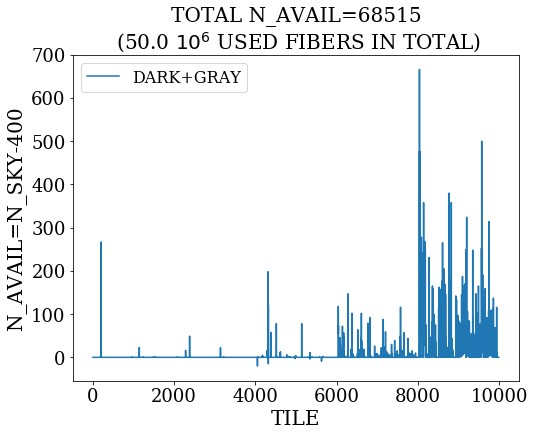

In [86]:
output_json = json.load(open('0.38.0/fba_dark_north/qa.json'))
n_sky = list()
tile_id = list()
for k in output_json.keys():
    n_sky.append(output_json[k]['assign_sky'])
    tile_id.append(np.int(k))
output_json = json.load(open('0.38.0/fba_dark_south/qa.json'))
for k in output_json.keys():
    n_sky.append(output_json[k]['assign_sky'])
    tile_id.append(np.int(k))

tile_id = np.array(tile_id)
n_sky = np.array(n_sky)
n_science = np.array(n_science)
ii_tile = np.argsort(tile_id)

plt.figure(figsize=(8,6))
plt.plot(n_sky[ii_tile]-400.0, label='DARK+GRAY')
plt.xlabel('TILE')
plt.ylabel('N_AVAIL=N_SKY-400')
plt.legend()
plt.title("TOTAL N_AVAIL={}\n ({:.1f} $10^6$ USED FIBERS IN TOTAL)".format(np.sum(n_sky-400), 5*len(n_sky)/1000))


Text(0.5,1,'TOTAL N_AVAIL=1384402\n (20.8 $10^6$ USED FIBERS IN TOTAL)')

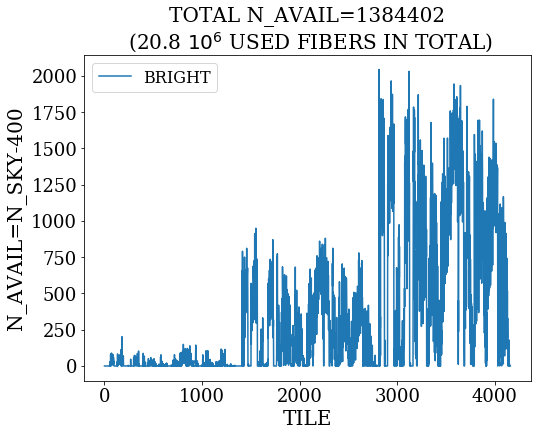

In [85]:
output_json = json.load(open('0.38.0/fba_bright_north/qa.json'))
n_sky = list()
tile_id = list()
for k in output_json.keys():
    n_sky.append(output_json[k]['assign_sky'])
    tile_id.append(np.int(k))
output_json = json.load(open('0.38.0/fba_bright_south/qa.json'))
for k in output_json.keys():
    n_sky.append(output_json[k]['assign_sky'])
    tile_id.append(np.int(k))

tile_id = np.array(tile_id)
n_sky = np.array(n_sky)
n_science = np.array(n_science)
ii_tile = np.argsort(tile_id)

plt.figure(figsize=(8,6))
plt.plot(n_sky[ii_tile]-400.0, label='BRIGHT')
plt.xlabel('TILE')
plt.ylabel('N_AVAIL=N_SKY-400')
plt.legend()
plt.title("TOTAL N_AVAIL={}\n ({:.1f} $10^6$ USED FIBERS IN TOTAL)".format(np.sum(n_sky-400), 5*len(n_sky)/1000))


Text(0.5,1,'TOTAL N_SCIENCE=31673711\n (34.5 $10^6$ FIBERS)')

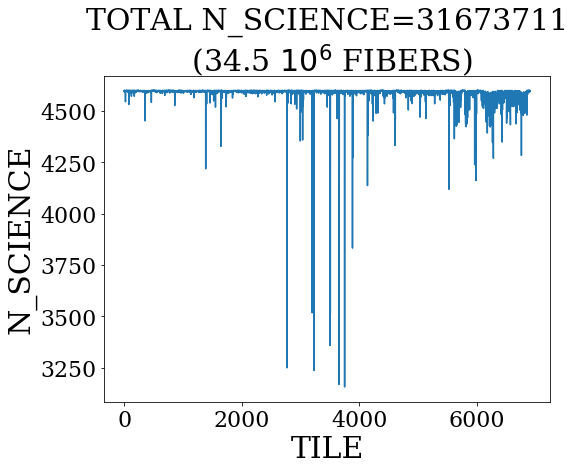

In [61]:
plt.figure(figsize=(8,6))
plt.plot(n_science)
plt.xlabel('TILE')
plt.ylabel('N_SCIENCE')
plt.title("TOTAL N_SCIENCE={}\n ({:.1f} $10^6$ FIBERS)".format(np.sum(n_science), 5*len(n_science)/1000))

In [14]:
data = Table.read("fba_summary_cut_dark_north_30_70_split.fits")

In [20]:
data[:10]

BRICKNAME,RA,DEC,FLUX_R,MW_TRANSMISSION_R,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,NUMOBS_MORE,PRIORITY,OBSCONDITIONS,NUMOBS,NAVAIL_FIBER,NAVAIL_TILE,isELG,isLRG,isQSO,isBGS_ANY,isMWS_ANY
str8,float64,float64,float32,float32,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int32,int64,int64,int64,bool,bool,bool,bool,bool
1600m100,160.03435447450678,-9.999907575228113,12.859381,0.9340627,35185519889481821,1152921504606846976,65537,0,0.825803103461278,2000,1,26723,1,2000,7,0,0,0,False,False,False,True,False
1600m100,160.10429964126712,-9.996283216331289,2.508548,0.93321687,35185519889481844,262148,0,0,0.31363623633083515,3400,4,26723,4,3400,1,0,0,0,False,False,True,False,False
1600m100,160.0158031866882,-9.994639452440698,0.7278188,0.933861,35185519889481850,131074,0,0,0.47508466311403985,3000,1,26723,1,3000,1,0,0,0,True,False,False,False,False
1600m100,160.0602140910561,-9.989811455011889,12.176763,0.93386054,35185519889481878,1152921504606846976,65537,0,0.693241180345739,2000,1,26723,1,2000,7,0,0,0,False,False,False,True,False
1600m100,160.0279397582295,-9.989927121142006,0.8408744,0.9338889,35185519889481881,131074,0,0,0.20250506984487682,3000,1,26723,1,3000,1,0,0,0,True,False,False,False,False
1600m100,160.09785384608918,-9.989578358877843,0.36165366,0.93301433,35185519889481885,131074,0,0,0.16216362942046192,3000,1,26723,1,3000,1,0,0,0,True,False,False,False,False
1600m100,160.07689355503683,-9.988903485318625,0.8537881,0.9334103,35185519889481889,262148,0,0,0.494312775158427,3400,4,26723,4,3400,1,0,0,0,False,False,True,False,False
1600m100,160.08351487379946,-9.987720597604786,0.5788897,0.9332204,35185519889481890,131074,0,0,0.9862570902433481,3000,1,26723,1,3000,2,0,0,0,True,False,False,False,False
1600m100,160.10541505520155,-9.988515481771714,0.95452905,0.9329506,35185519889481893,65537,0,0,0.8791244783408612,3200,1,26723,1,3200,1,0,0,0,False,True,False,False,False


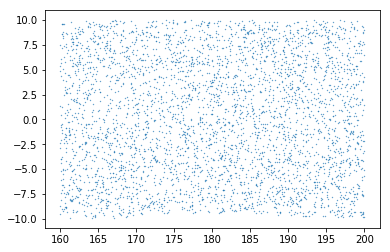

In [21]:
n_targets = len(data)
r = np.random.random(n_targets)
rr = r<0.001
plt.scatter(data['RA'][rr], data['DEC'][rr], s=0.1)

In [22]:
def plot_avail(target_class='isELG'):
    ii = (data['NAVAIL_FIBER']!=0) & data[target_class]
    _ = plt.hist(data['NUMOBS'][ii], bins=np.arange(7))
    plt.xlabel('NUMOBS')
    plt.ylabel('Number of {} targets'.format(target_class))

    n_obs = np.count_nonzero((data['NAVAIL_FIBER']!=0) & data[target_class] & (data['NUMOBS']>0))
    n_avail = np.count_nonzero((data['NAVAIL_FIBER']!=0) & data[target_class])

    eff =  n_obs/n_avail
    plt.title("Global efficiency: {:.2f}".format(eff))

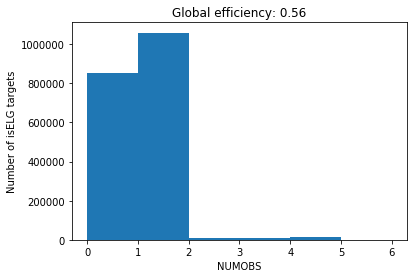

In [23]:
plot_avail(target_class='isELG')

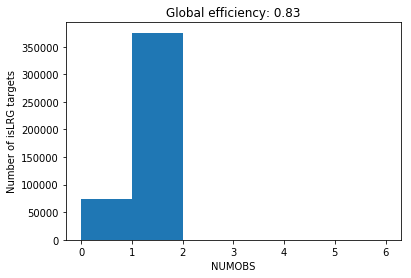

In [24]:
plot_avail(target_class='isLRG')

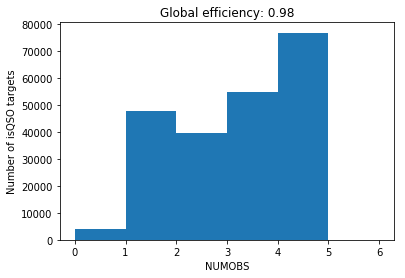

In [25]:
plot_avail(target_class='isQSO')

In [26]:
missed_qsos = (data['NAVAIL_FIBER']!=0) & (data['isQSO']) & (data['NUMOBS']==0)
print('{} QSOs in total'.format(np.count_nonzero(data['isQSO'])))
print('{} QSOs were missed'.format(np.count_nonzero(missed_qsos)))

226467 QSOs in total
4051 QSOs were missed


Text(0.5,1,'Spatial distribution of missed QSOs')

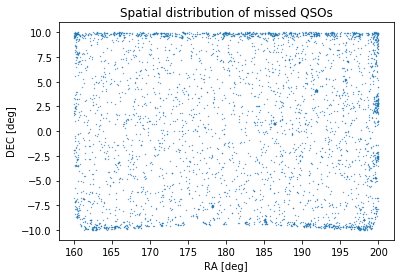

In [27]:
plt.scatter(data['RA'][missed_qsos], data['DEC'][missed_qsos], s=0.1)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Spatial distribution of missed QSOs')

4.225332387715345
2.531226857566033


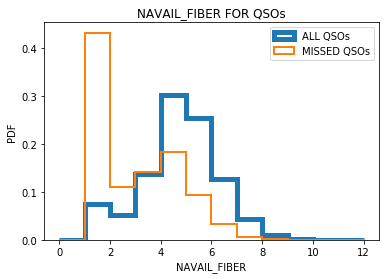

In [28]:
plt.hist(data['NAVAIL_FIBER'][data['isQSO']&(data['NAVAIL_FIBER']>0)], 
         bins=np.linspace(0,12,13),normed=True,histtype='step', linewidth=5, label='ALL QSOs')
plt.hist(data['NAVAIL_FIBER'][missed_qsos], 
         bins=np.linspace(0,12,13),normed=True, histtype='step', linewidth=2, label='MISSED QSOs')
plt.xlabel("NAVAIL_FIBER")
plt.ylabel("PDF")
plt.title("NAVAIL_FIBER FOR QSOs")
plt.legend()
print(np.mean(data['NAVAIL_FIBER'][data['isQSO']&(data['NAVAIL_FIBER']>0)]))
print(np.mean(data['NAVAIL_FIBER'][missed_qsos]))

4.156800248938676
2.494327390599676


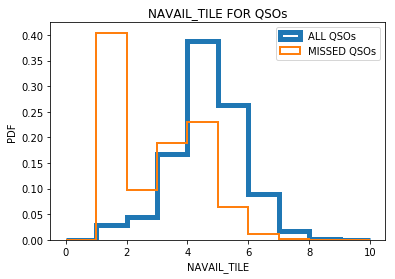

In [13]:
plt.hist(data['NAVAIL_TILE'][data['isQSO']&(data['NAVAIL_TILE']>0)], 
         bins=np.linspace(0,10,11),normed=True,histtype='step', linewidth=5, label='ALL QSOs')
plt.hist(data['NAVAIL_TILE'][missed_qsos], 
         bins=np.linspace(0,10,11),normed=True, histtype='step', linewidth=2, label='MISSED QSOs')
plt.xlabel("NAVAIL_TILE")
plt.ylabel("PDF")
plt.title("NAVAIL_TILE FOR QSOs")
plt.legend()
print(np.mean(data['NAVAIL_TILE'][data['isQSO']&(data['NAVAIL_TILE']>0)]))
print(np.mean(data['NAVAIL_TILE'][missed_qsos]))